In [134]:
import pandas as pd
from preprocessing import pregame
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
df=pd.read_csv("imdb_top_1000.csv")

In [175]:
pre = pregame(df)

In [176]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [177]:
pre.checks()

INFO: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    float64
dtypes: float64(3), int64(1), object(12)
memory usage: 125.1+ KB
None
DESCRIPTION: 
       IMDB

In [178]:
#df["Released_Year"] = pd.to_datetime(df["Released_Year"])

df["Gross"] = df["Gross"].str.replace(',', '').astype(float)
df["Gross"] = df["Gross"].astype(float)


AttributeError: Can only use .str accessor with string values!

In [ ]:

df["Gross"]

In [179]:
df["Certificate"].value_counts()

U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: Certificate, dtype: int64

In [180]:
pre.foreplay("Meta_score", 0)
pre.foreplay("Gross", "mean")
pre.foreplay("Certificate", "unknown")


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,2.834147e+07
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,1.349664e+08
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,5.348584e+08
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,5.730000e+07
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4.360000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,6.803475e+07
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,6.803475e+07
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,3.050000e+07
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,unknown,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,6.803475e+07


In [181]:
df.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [146]:
rating_per_year= df.groupby("Released_Year")["IMDB_Rating"].count().reset_index(name="rating_count")

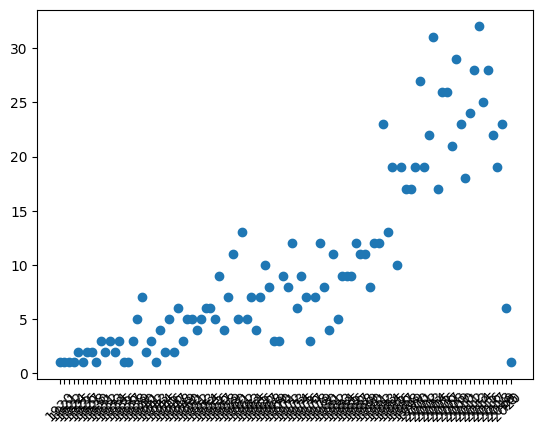

In [147]:
plt.scatter(rating_per_year.Released_Year,rating_per_year.rating_count)
plt.xticks(rotation = 45)
plt.show()

In [148]:
labels = ["1920s", "1930s", "1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s", "2020s"]
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

df["Decades"]=pd.cut(df['Released_Year'], bins=11, labels=labels)

In [149]:
rating_per_decade= df.groupby("Decades")["IMDB_Rating"].sum().reset_index(name="rating_count")

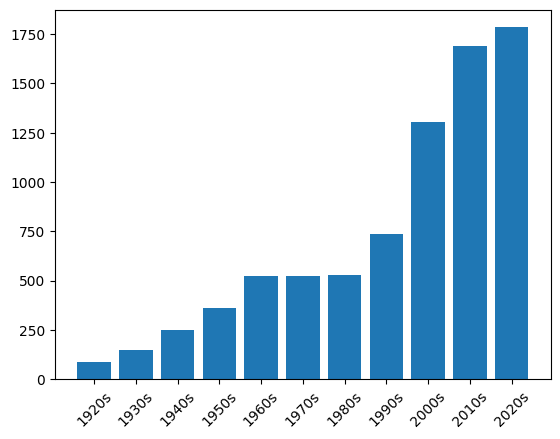

In [150]:
plt.bar(rating_per_decade.Decades,rating_per_decade.rating_count)
plt.xticks(rotation = 45)
plt.show()

In [151]:
movies_across_genres = df.groupby("Genre")["Series_Title"].count().reset_index().sort_values(by="Series_Title", ascending = False).head(10)
movies_across_genres

,Genre,Series_Title
137,Drama,85
172,"Drama, Romance",37
100,"Comedy, Drama",35
105,"Comedy, Drama, Romance",31
22,"Action, Crime, Drama",30
132,"Crime, Drama, Thriller",28
87,"Biography, Drama, History",28
129,"Crime, Drama, Mystery",27
122,"Crime, Drama",26
67,"Animation, Adventure, Comedy",24


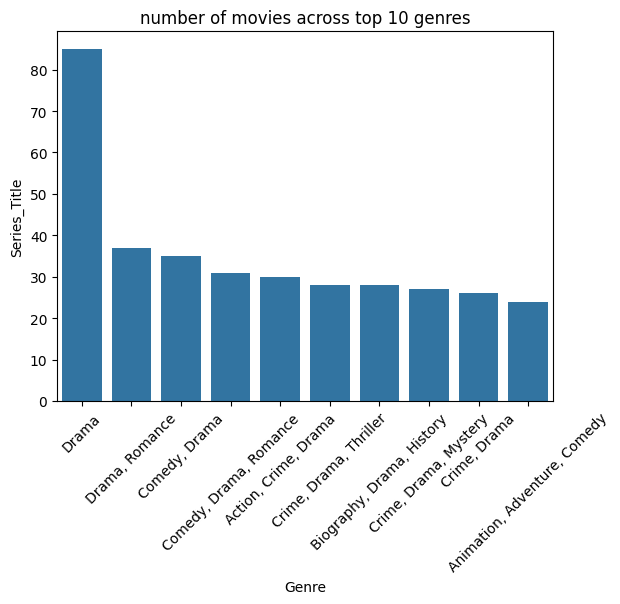

In [152]:
sns.barplot(x='Genre', y='Series_Title', data=movies_across_genres)
plt.xticks(rotation = 45)
plt.title("number of movies across top 10 genres")
plt.show()

In [153]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross', 'Decades'],
      dtype='object')

In [184]:
director_rating_mean = df.groupby("Director")["Meta_score"].value_counts().reset_index(name="count").sort_values(by= "count", ascending = False).head(20)
director_rating_mean

,Director,Meta_score,count
9,Akira Kurosawa,0.0,6
340,Howard Hawks,0.0,4
585,Neeraj Pandey,0.0,4
49,Andrei Tarkovsky,0.0,4
325,Hayao Miyazaki,86.0,3
36,Alfred Hitchcock,100.0,3
91,Billy Wilder,0.0,3
324,Hayao Miyazaki,83.0,3
249,Federico Fellini,0.0,3
134,Charles Chaplin,0.0,3


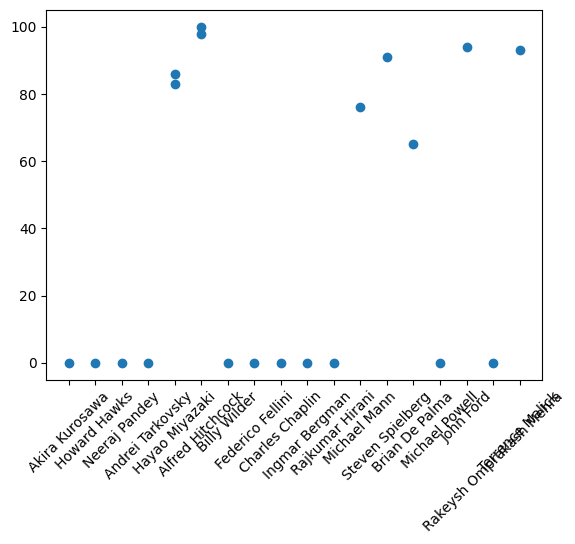

In [185]:

plt.scatter(director_rating_mean.Director, director_rating_mean.Meta_score)
plt.xticks(rotation = 45)
plt.show()

In [191]:
subset = ['Star1', 'Star2', 'Star3', 'Star4',"IMDB_Rating", "Gross"]
df_subset = df[subset]
df_subset

,Star1,Star2,Star3,Star4,IMDB_Rating,Gross
0,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,9.3,2.834147e+07
1,Marlon Brando,Al Pacino,James Caan,Diane Keaton,9.2,1.349664e+08
2,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,9.0,5.348584e+08
3,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,9.0,5.730000e+07
4,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,9.0,4.360000e+06
...,...,...,...,...,...,...
995,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,7.6,6.803475e+07
996,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,7.6,6.803475e+07
997,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,7.6,3.050000e+07
998,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,7.6,6.803475e+07


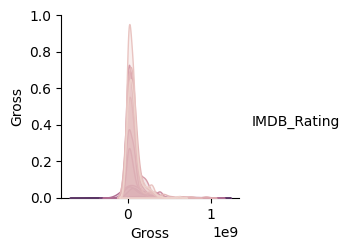

In [199]:
sns.pairplot(df_subset, hue='IMDB_Rating', markers="o") #the only numeric cols
plt.show()

In [196]:
df_box = df[["Genre", "IMDB_Rating"]]

<Axes: >

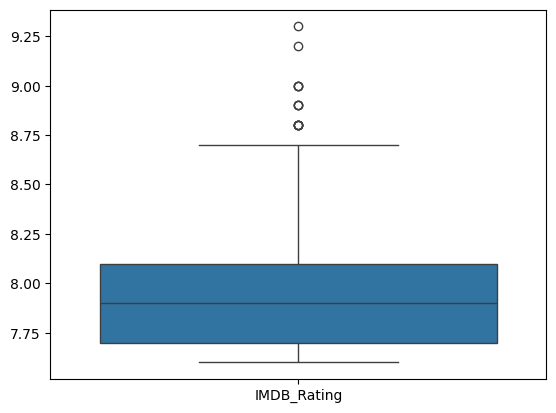

In [197]:
sns.boxplot(df_box)

In [205]:
cols_heat = ["IMDB_Rating", "Meta_score", "No_of_Votes", "Gross"]
df_heat = df[cols_heat]
corelation_matrix = df_heat.corr()
corelation_matrix

,IMDB_Rating,Meta_score,No_of_Votes,Gross
IMDB_Rating,1.000000,-0.043346,0.494979,0.089881
Meta_score,-0.043346,1.000000,0.253058,0.120920
No_of_Votes,0.494979,0.253058,1.000000,0.549582
Gross,0.089881,0.120920,0.549582,1.000000


<Axes: >

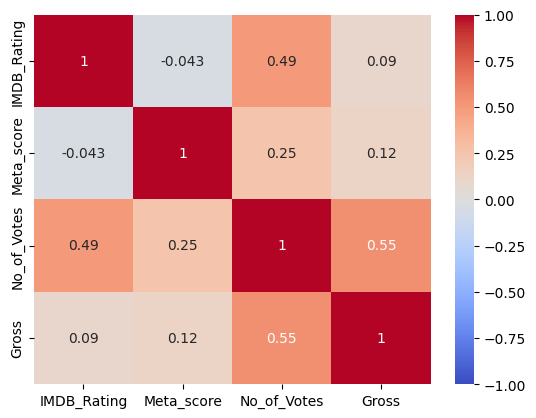

In [210]:
sns.heatmap(corelation_matrix, annot=True, cmap='coolwarm',vmin=-1, vmax=1)